In [1]:
import pandas as pd
import glob
import sklearn
import numpy as np
import matplotlib as plt

In [2]:
p_files_train = glob.glob('/Users/julia/Desktop/propane/*03.2019_R*.csv')
h_files_train = glob.glob('/Users/julia/Desktop/h2/*03.2019_R*.csv')
p_files_test = glob.glob('/Users/julia/Desktop/propane/*04.2019_R*.csv')
h_files_test = glob.glob('/Users/julia/Desktop/h2/*04.2019_R*.csv')  #добавляю файлы с компа

p_train = []
h_train = [] # создаем дата фрейм для каждого газа
p_test = []
h_test = []


for p_file in p_files_train:
    p_train.append(pd.read_csv(p_file))  # добавляем данные в фрейм

for h_file in h_files_train:
    h_train.append(pd.read_csv(h_file))   
    
for p_file in p_files_test:
    p_test.append(pd.read_csv(p_file))

for h_file in h_files_test:
    h_test.append(pd.read_csv(h_file))
    
p_train = pd.concat(p_train, ignore_index=True)
p_test = pd.concat(p_test, ignore_index=True)
h_train = pd.concat(h_train, ignore_index=True)
h_test = pd.concat(h_test, ignore_index=True)   

p_train = p_train.to_numpy()   # делаем матрицу нампай
p_test = p_test.to_numpy()
h_train = h_train.to_numpy()
h_test = h_test.to_numpy()

X_train_p = p_train[:,2:552]   # выделяем нужные данные, (столбцы)
X_train_h = h_train[:,2:552] 
X_test_p = p_test[:,2:552] 
X_test_h = h_test[:,2:552] 

X_train = np.concatenate((X_train_p , X_train_h), axis=0)  # соеденияем наши газы в тест и трейн
X_test = np.concatenate((X_test_p , X_test_h), axis=0)     

y_train_p = np.zeros((11800, 2)) # for propane
y_test_p = np.zeros((5664, 2))
y_train_h = np.zeros((11328, 2))  # for h2
y_test_h = np.zeros((6608, 2))

y_train_p[:, 0] = 1 # propane - 1,0
y_test_p[:, 0] = 1
y_train_h[:, 1] = 1 # h2 - 0,1
y_test_h[:, 1] = 1

y_train = np.concatenate((y_train_p , y_train_h), axis=0) # combine train propane and h2    
y_test = np.concatenate((y_test_p, y_test_h), axis=0)  # combine test propane and h2    

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    validation_fraction=0.1,
    activation = 'logistic' ,
    batch_size=64,
    max_iter=10000,
    early_stopping=True,
    n_iter_no_change= 100,
    verbose=True
)

model.fit(X_train_new,y_train)

train_score = model.score(X_train_new, y_train)
test_score = model.score(X_test_new, y_test)

print("Train score: %.4f" % train_score)
print("Test score:  %.4f" % test_score)

Iteration 1, loss = 0.63951903
Validation score: 0.923476
Iteration 2, loss = 0.49508293
Validation score: 0.930393
Iteration 3, loss = 0.43531466
Validation score: 0.933420
Iteration 4, loss = 0.39915834
Validation score: 0.937311
Iteration 5, loss = 0.37782487
Validation score: 0.939905
Iteration 6, loss = 0.36358686
Validation score: 0.942931
Iteration 7, loss = 0.34848358
Validation score: 0.945093
Iteration 8, loss = 0.34189667
Validation score: 0.944228
Iteration 9, loss = 0.33052554
Validation score: 0.950713
Iteration 10, loss = 0.32394461
Validation score: 0.953740
Iteration 11, loss = 0.32584757
Validation score: 0.948119
Iteration 12, loss = 0.31420491
Validation score: 0.953740
Iteration 13, loss = 0.31517338
Validation score: 0.948984
Iteration 14, loss = 0.30923035
Validation score: 0.951146
Iteration 15, loss = 0.30470825
Validation score: 0.954604
Iteration 16, loss = 0.29983919
Validation score: 0.952875
Iteration 17, loss = 0.29978163
Validation score: 0.959792
Iterat

Iteration 140, loss = 0.16322068
Validation score: 0.971033
Iteration 141, loss = 0.15855074
Validation score: 0.971898
Iteration 142, loss = 0.16044706
Validation score: 0.972763
Iteration 143, loss = 0.15735322
Validation score: 0.973627
Iteration 144, loss = 0.14997199
Validation score: 0.974060
Iteration 145, loss = 0.15367632
Validation score: 0.972330
Iteration 146, loss = 0.15344357
Validation score: 0.971898
Iteration 147, loss = 0.15306820
Validation score: 0.972763
Iteration 148, loss = 0.15146304
Validation score: 0.974492
Iteration 149, loss = 0.15402972
Validation score: 0.970169
Iteration 150, loss = 0.15081035
Validation score: 0.976221
Iteration 151, loss = 0.14732809
Validation score: 0.974924
Iteration 152, loss = 0.15345464
Validation score: 0.973627
Iteration 153, loss = 0.15038159
Validation score: 0.976221
Iteration 154, loss = 0.15038569
Validation score: 0.976221
Iteration 155, loss = 0.14927715
Validation score: 0.973627
Iteration 156, loss = 0.15310200
Validat

Iteration 277, loss = 0.12204681
Validation score: 0.974060
Iteration 278, loss = 0.11894420
Validation score: 0.979248
Iteration 279, loss = 0.11892077
Validation score: 0.980112
Iteration 280, loss = 0.11853206
Validation score: 0.981409
Iteration 281, loss = 0.12342904
Validation score: 0.978815
Iteration 282, loss = 0.11940944
Validation score: 0.979680
Iteration 283, loss = 0.11941423
Validation score: 0.979248
Iteration 284, loss = 0.12937354
Validation score: 0.980112
Iteration 285, loss = 0.12626109
Validation score: 0.978383
Iteration 286, loss = 0.12350392
Validation score: 0.977518
Iteration 287, loss = 0.12186643
Validation score: 0.978815
Iteration 288, loss = 0.11933256
Validation score: 0.977518
Iteration 289, loss = 0.13132937
Validation score: 0.980545
Iteration 290, loss = 0.12278709
Validation score: 0.976654
Iteration 291, loss = 0.12715936
Validation score: 0.977951
Iteration 292, loss = 0.12279169
Validation score: 0.978815
Iteration 293, loss = 0.12700040
Validat

Iteration 414, loss = 0.10527022
Validation score: 0.980545
Iteration 415, loss = 0.10914897
Validation score: 0.978815
Iteration 416, loss = 0.10673114
Validation score: 0.979680
Iteration 417, loss = 0.11348790
Validation score: 0.977951
Iteration 418, loss = 0.10876438
Validation score: 0.983571
Iteration 419, loss = 0.10802648
Validation score: 0.982706
Iteration 420, loss = 0.10959410
Validation score: 0.980545
Iteration 421, loss = 0.10608147
Validation score: 0.979680
Iteration 422, loss = 0.10571367
Validation score: 0.981842
Iteration 423, loss = 0.10676674
Validation score: 0.979680
Iteration 424, loss = 0.10324956
Validation score: 0.979248
Iteration 425, loss = 0.10567940
Validation score: 0.974924
Iteration 426, loss = 0.10531431
Validation score: 0.984003
Iteration 427, loss = 0.11245577
Validation score: 0.982706
Iteration 428, loss = 0.10511744
Validation score: 0.981409
Iteration 429, loss = 0.10736786
Validation score: 0.981842
Iteration 430, loss = 0.10378426
Validat

In [5]:
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(X_train_new,y_train[:,0])
train_score_svc = svc.score(X_train_new, y_train[:,0])
test_score_svc = svc.score(X_test_new, y_test[:,0])
print(train_score_svc,test_score_svc)

0.9372189553787617 0.8935788787483703


In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge')
sgd.fit(X_train_new,y_train[:,0])
train_score_sgd = sgd.score(X_train_new, y_train[:,0])
test_score_sgd = sgd.score(X_test_new, y_test[:,0])
print(train_score_sgd,test_score_sgd)

0.9208751297129021 0.9023794002607562


In [7]:
from sklearn.calibration import CalibratedClassifierCV
calibrator_forsgd = CalibratedClassifierCV(sgd, cv='prefit')
sgd_c = calibrator_forsgd.fit(X_train_new, y_train[:,0])

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_new,y_train[:,0])
train_score_rfc = rfc.score(X_train_new, y_train[:,0])
test_score_rfc = rfc.score(X_test_new, y_test[:,0])
print(train_score_rfc,test_score_rfc)

1.0 0.8465612777053455


In [9]:
predict_prob_mlp = model.predict_proba(X_test_new)
predict_prob_svc = svc.predict_proba(X_test_new)
predict_prob_sgd = sgd_c.predict_proba(X_test_new)
predict_prob_rfc = rfc.predict_proba(X_test_new)
print(predict_prob_mlp,predict_prob_svc,predict_prob_sgd, predict_prob_rfc)

[[0.95213834 0.04806645]
 [0.96305205 0.03695675]
 [0.94516293 0.0550028 ]
 ...
 [0.76035683 0.24082026]
 [0.70771031 0.29336659]
 [0.73991391 0.26129874]] [[0.06168976 0.93831024]
 [0.09995059 0.90004941]
 [0.10232633 0.89767367]
 ...
 [0.990287   0.009713  ]
 [0.99029946 0.00970054]
 [0.99014605 0.00985395]] [[2.03854304e-04 9.99796146e-01]
 [5.97369581e-04 9.99402630e-01]
 [7.11833981e-04 9.99288166e-01]
 ...
 [8.87169810e-01 1.12830190e-01]
 [8.88434262e-01 1.11565738e-01]
 [8.81040659e-01 1.18959341e-01]] [[0.11 0.89]
 [0.33 0.67]
 [0.18 0.82]
 ...
 [0.46 0.54]
 [0.55 0.45]
 [0.56 0.44]]


In [19]:
from netcal.scaling import TemperatureScaling
temperature = TemperatureScaling()
temperature.fit(predict_prob_mlp[:,1], y_test[:,0])
temperature.fit(predict_prob_svc[:,0], y_test[:,0])
temperature.fit(predict_prob_sgd[:,0], y_test[:,0])
temperature.fit(predict_prob_rfc[:,0], y_test[:,0])
calibrated_temperature_mlp = temperature.transform(predict_prob_mlp[:,1])
calibrated_temperature_svc = temperature.transform(predict_prob_svc[:,0])
calibrated_temperature_sgd = temperature.transform(predict_prob_sgd[:,0])
calibrated_temperature_rfc = temperature.transform(predict_prob_rfc[:,0])

from netcal.binning import HistogramBinning
histogram = HistogramBinning(detection=True)
histogram.fit(predict_prob_mlp[:,1], y_test[:,0])
histogram.fit(predict_prob_svc[:,0], y_test[:,0])
histogram.fit(predict_prob_sgd[:,0], y_test[:,0])
histogram.fit(predict_prob_rfc[:,0], y_test[:,0])
calibrated_histogram_mlp = histogram.transform(predict_prob_mlp[:,1])
calibrated_histogram_svc = histogram.transform(predict_prob_svc[:,0])
calibrated_histogram_sgd = histogram.transform(predict_prob_sgd[:,0])
calibrated_histogram_rfc = histogram.transform(predict_prob_rfc[:,0])

from netcal.binning import IsotonicRegression
isotonic = IsotonicRegression()
isotonic.fit(predict_prob_mlp[:,0], y_test[:,0])
isotonic.fit(predict_prob_svc[:,1], y_test[:,0])
isotonic.fit(predict_prob_sgd[:,1], y_test[:,0])
isotonic.fit(predict_prob_rfc[:,1], y_test[:,0])
calibrated_isotonic_mlp = isotonic.transform(predict_prob_mlp[:,0])
calibrated_isotonic_svc = isotonic.transform(predict_prob_svc[:,1])
calibrated_isotonic_sgd = isotonic.transform(predict_prob_sgd[:,1])
calibrated_isotonic_rfc = isotonic.transform(predict_prob_rfc[:,1])

from netcal.binning import BBQ
bbq = BBQ()
bbq.fit(predict_prob_mlp[:,1], y_test[:,0])
bbq.fit(predict_prob_svc[:,0], y_test[:,0])
bbq.fit(predict_prob_sgd[:,0], y_test[:,0])
bbq.fit(predict_prob_rfc[:,0], y_test[:,0])
calibrated_bbq_mlp = bbq.transform(predict_prob_mlp[:,1])
calibrated_bbq_svc = bbq.transform(predict_prob_svc[:,0])
calibrated_bbq_sgd = bbq.transform(predict_prob_sgd[:,0])
calibrated_bbq_rfc = bbq.transform(predict_prob_rfc[:,0])

In [20]:
from sklearn.metrics import roc_auc_score  # calculate score

score_mlp = roc_auc_score(y_test[:,0], predict_prob_mlp[:,0])
tm_score_mlp = roc_auc_score(y_test[:,0],calibrated_temperature_mlp)
his_score_mlp = roc_auc_score(y_test[:,0],calibrated_histogram_mlp)
ir_score_mlp = roc_auc_score(y_test[:,0],calibrated_isotonic_mlp)
bbq_score_mlp = roc_auc_score(y_test[:,0],calibrated_bbq_mlp)

score_svc = roc_auc_score(y_test[:,0], predict_prob_svc[:,1])
tm_score_svc = roc_auc_score(y_test[:,0],calibrated_temperature_svc)
his_score_svc = roc_auc_score(y_test[:,0],calibrated_histogram_svc)
ir_score_svc = roc_auc_score(y_test[:,0],calibrated_isotonic_svc)
bbq_score_svc = roc_auc_score(y_test[:,0],calibrated_bbq_svc)

score_sgd = roc_auc_score(y_test[:,0], predict_prob_sgd[:,1])
tm_score_sgd = roc_auc_score(y_test[:,0],calibrated_temperature_sgd)
his_score_sgd = roc_auc_score(y_test[:,0],calibrated_histogram_sgd)
ir_score_sgd = roc_auc_score(y_test[:,0],calibrated_isotonic_sgd)
bbq_score_sgd = roc_auc_score(y_test[:,0],calibrated_bbq_sgd)

score_rfc = roc_auc_score(y_test[:,0], predict_prob_rfc[:,1])
tm_score_rfc = roc_auc_score(y_test[:,0],calibrated_temperature_rfc)
his_score_rfc = roc_auc_score(y_test[:,0],calibrated_histogram_rfc)
ir_score_rfc = roc_auc_score(y_test[:,0],calibrated_isotonic_rfc)
bbq_score_rfc = roc_auc_score(y_test[:,0],calibrated_bbq_rfc)

In [26]:
his_score_sgd

0.9221166124180928

In [21]:
from sklearn.metrics import roc_curve  # calculate roc curve (points)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test[:,0], predict_prob_mlp[:,0])
fpr_svc, tpr_svc, _ = roc_curve(y_test[:,0], predict_prob_svc[:,1])
fpr_sgd, tpr_sgd, _ = roc_curve(y_test[:,0], predict_prob_sgd[:,1])
fpr_rfc, tpr_rfc, _ = roc_curve(y_test[:,0], predict_prob_rfc[:,1])

tm_fpr_mlp, tm_tpr_mlp, _ = roc_curve(y_test[:,0], calibrated_temperature_mlp)
tm_fpr_svc, tm_tpr_svc, _ = roc_curve(y_test[:,0], calibrated_temperature_svc)
tm_fpr_sgd, tm_tpr_sgd, _ = roc_curve(y_test[:,0], calibrated_temperature_sgd)
tm_fpr_rfc, tm_tpr_rfc, _ = roc_curve(y_test[:,0], calibrated_temperature_rfc)

his_fpr_mlp, his_tpr_mlp, _ = roc_curve(y_test[:,0], calibrated_histogram_mlp)
his_fpr_svc, his_tpr_svc, _ = roc_curve(y_test[:,0], calibrated_histogram_svc)
his_fpr_sgd, his_tpr_sgd, _ = roc_curve(y_test[:,0], calibrated_histogram_sgd)
his_fpr_rfc, his_tpr_rfc, _ = roc_curve(y_test[:,0], calibrated_histogram_rfc)

ir_fpr_mlp, ir_tpr_mlp, _ = roc_curve(y_test[:,0], calibrated_isotonic_mlp)
ir_fpr_svc, ir_tpr_svc, _ = roc_curve(y_test[:,0], calibrated_isotonic_svc)
ir_fpr_sgd, ir_tpr_sgd, _ = roc_curve(y_test[:,0], calibrated_isotonic_sgd)
ir_fpr_rfc, ir_tpr_rfc, _ = roc_curve(y_test[:,0], calibrated_isotonic_rfc)

bbq_fpr_mlp, bbq_tpr_mlp, _ = roc_curve(y_test[:,0], calibrated_bbq_mlp)
bbq_fpr_svc, bbq_tpr_svc, _ = roc_curve(y_test[:,0], calibrated_bbq_svc)
bbq_fpr_sgd, bbq_tpr_sgd, _ = roc_curve(y_test[:,0], calibrated_bbq_sgd)
bbq_fpr_rfc, bbq_tpr_rfc, _ = roc_curve(y_test[:,0], calibrated_bbq_rfc)

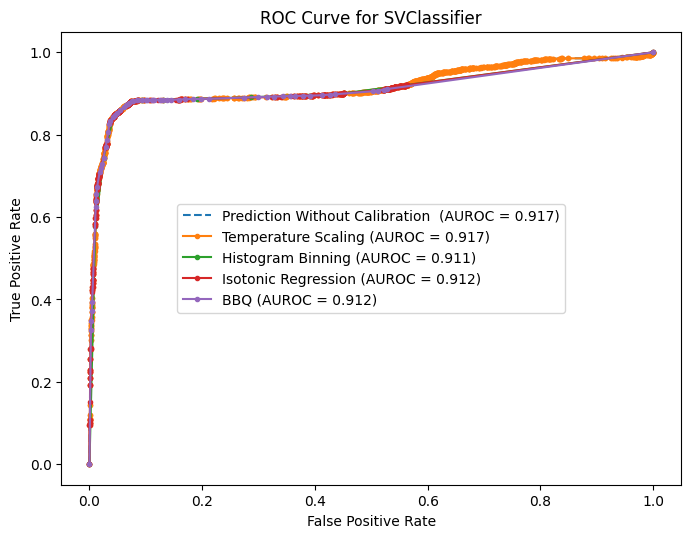

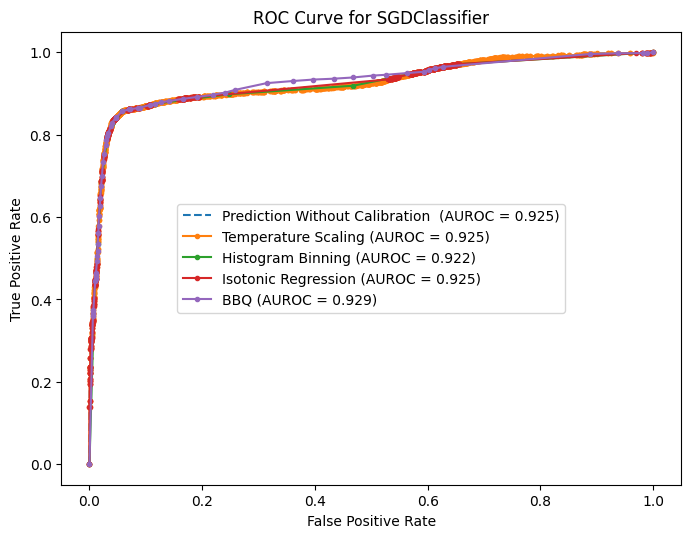

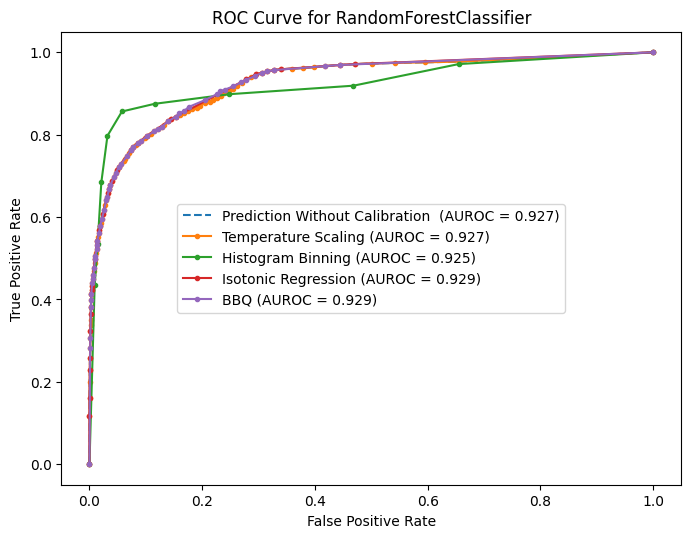

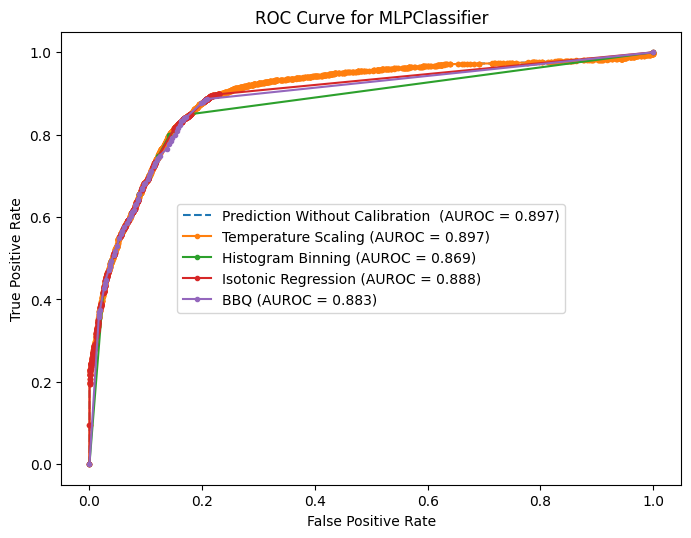

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr_svc, tpr_svc, linestyle='--', label='Prediction Without Calibration  (AUROC = %0.3f)' % score_svc)
plt.plot(tm_fpr_svc, tm_tpr_svc, marker='.', label='Temperature Scaling (AUROC = %0.3f)' % tm_score_svc)
plt.plot(his_fpr_svc, his_tpr_svc, marker='.', label='Histogram Binning (AUROC = %0.3f)' % his_score_svc)
plt.plot(ir_fpr_svc, ir_tpr_svc, marker='.', label='Isotonic Regression (AUROC = %0.3f)' % ir_score_svc)
plt.plot(bbq_fpr_svc, bbq_tpr_svc, marker='.', label='BBQ (AUROC = %0.3f)' % bbq_score_svc)

# Title
plt.title('ROC Curve for SVClassifier')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=10, prop={'size': 10}) # 
# Show plot
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr_sgd, tpr_sgd, linestyle='--', label='Prediction Without Calibration  (AUROC = %0.3f)' % score_sgd)
plt.plot(tm_fpr_sgd, tm_tpr_sgd, marker='.', label='Temperature Scaling (AUROC = %0.3f)' % tm_score_sgd)
plt.plot(his_fpr_sgd, his_tpr_sgd, marker='.', label='Histogram Binning (AUROC = %0.3f)' % his_score_sgd)
plt.plot(ir_fpr_sgd, ir_tpr_sgd, marker='.', label='Isotonic Regression (AUROC = %0.3f)' % ir_score_sgd)
plt.plot(bbq_fpr_sgd, bbq_tpr_sgd, marker='.', label='BBQ (AUROC = %0.3f)' % bbq_score_sgd)
# Title
plt.title('ROC Curve for SGDClassifier')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=10, prop={'size': 10}) # 
# Show plot
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr_rfc, tpr_rfc, linestyle='--', label='Prediction Without Calibration  (AUROC = %0.3f)' % score_rfc)
plt.plot(tm_fpr_rfc, tm_tpr_rfc, marker='.', label='Temperature Scaling (AUROC = %0.3f)' % tm_score_rfc)
plt.plot(his_fpr_sgd, his_tpr_sgd, marker='.', label='Histogram Binning (AUROC = %0.3f)' % his_score_rfc)
plt.plot(ir_fpr_rfc, ir_tpr_rfc, marker='.', label='Isotonic Regression (AUROC = %0.3f)' % ir_score_rfc)
plt.plot(bbq_fpr_rfc, bbq_tpr_rfc, marker='.', label='BBQ (AUROC = %0.3f)' % bbq_score_rfc)
# Title
plt.title('ROC Curve for RandomForestClassifier')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=10, prop={'size': 10}) # 
# Show plot
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr_mlp, tpr_mlp, linestyle='--', label='Prediction Without Calibration  (AUROC = %0.3f)' % score_mlp)
plt.plot(tm_fpr_mlp, tm_tpr_mlp, marker='.', label='Temperature Scaling (AUROC = %0.3f)' % tm_score_mlp)
plt.plot(his_fpr_mlp, his_tpr_mlp, marker='.', label='Histogram Binning (AUROC = %0.3f)' % his_score_mlp)
plt.plot(ir_fpr_mlp, ir_tpr_mlp, marker='.', label='Isotonic Regression (AUROC = %0.3f)' % ir_score_mlp)
plt.plot(bbq_fpr_mlp, bbq_tpr_mlp, marker='.', label='BBQ (AUROC = %0.3f)' % bbq_score_mlp)
# Title
plt.title('ROC Curve for MLPClassifier')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=10, prop={'size': 10}) # 
# Show plot
plt.show()

In [128]:
np.savez('data_mlp.npz', ground_truth = y_test, predictions = predict_prob_mlp)
np.savez('data_svc.npz', ground_truth = y_test, predictions = predict_prob_svc)
np.savez('data_sgd.npz', ground_truth = y_test, predictions = predict_prob_sgd)
np.savez('data_forest.npz', ground_truth = y_test, predictions = predict_prob_rfc)

data_mlp = np.load("/Users/julia/Desktop/ML/data.npz")
data_svc = np.load("/Users/julia/Desktop/ML/data_svc.npz")
data_sgd = np.load("/Users/julia/Desktop/ML/data_sgd.npz")
data_forest = np.load("/Users/julia/Desktop/ML/data_forest.npz")
#lst = data.files
#for item in lst:
#    print(item)
#    print(data[item])

In [154]:
lst = data_forest.files
for item in lst:
    print(item)
    print(data_forest[item])

ground_truth
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
predictions
[[0.17 0.83]
 [0.3  0.7 ]
 [0.25 0.75]
 ...
 [0.48 0.52]
 [0.57 0.43]
 [0.54 0.46]]


Build Гистограмма Уверености Гистограммный Бининг MLPClassifier model
Build Диаграмма Надежности Изотонная Регрессия  MLPClassifier model
Build Байесовский Бинниг MLPClassifier model
Build ENIR model
Build Logistic Calibration model
Build Температурное Шкалирование MLPClassifier model
Build Отклонение model
Default                                                   ACE: 0.13940 - ECE: 0.09697 - MCE: 0.24832
Гистограмма Уверености Гистограммный Бининг MLPClassifier ACE: 0.03668 - ECE: 0.01226 - MCE: 0.08649
Диаграмма Надежности Изотонная Регрессия  MLPClassifier   ACE: 0.06851 - ECE: 0.01640 - MCE: 0.44629
Байесовский Бинниг MLPClassifier                          ACE: 0.02168 - ECE: 0.01167 - MCE: 0.06660
ENIR                                                      ACE: 0.03811 - ECE: 0.02496 - MCE: 0.12409
Logistic Calibration                                      ACE: 0.03073 - ECE: 0.02335 - MCE: 0.06771
Температурное Шкалирование MLPClassifier                  ACE: 0.11532 - ECE: 0.08160

ValueError: operands could not be broadcast together with shapes (6136,) (6136,2) (6136,2) 

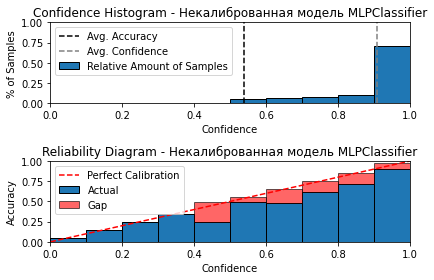

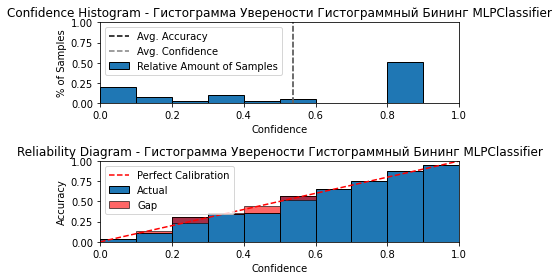

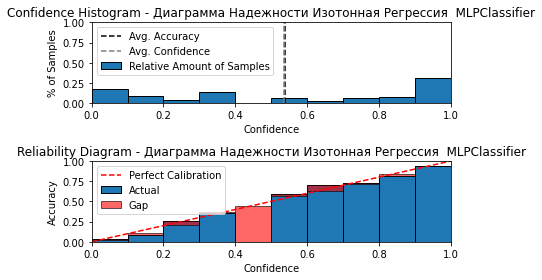

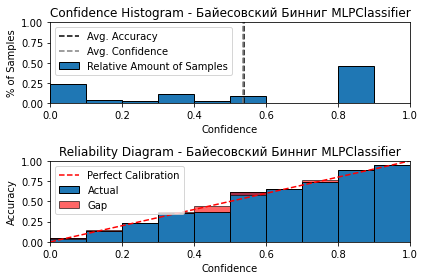

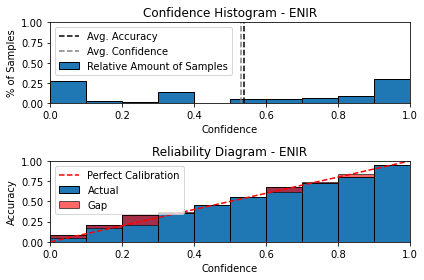

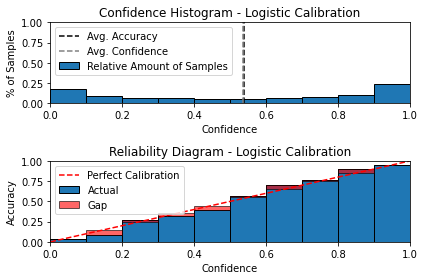

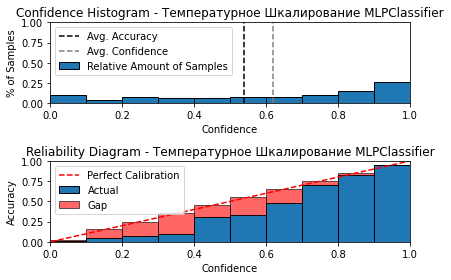

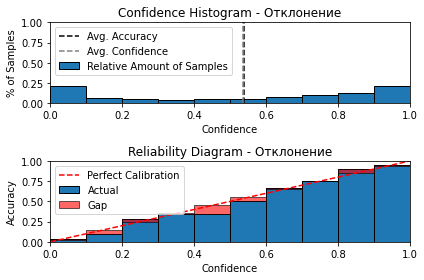

In [168]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

from netcal import global_accepts
from netcal.metrics import ACE, ECE, MCE
from netcal.presentation import ReliabilityDiagram


@global_accepts(list, str, int, (None, str), float, bool)
def single_example(models: list, datafile: str, bins: int, diagram: str = None,
                   validation_split: float = 0.7, save_models: bool = False) -> int:
    """
    Measure miscalibration of given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    diagram : str, optional, default: None
        Type of diagram wich should be plotted. This could be 'diagram', 'curve', 'inference' or None.
    validation_split : float
        Split ratio between build set and validation set.
    save_models : bool
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    # split data set into build set and validation set
    build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                        test_size=validation_split,
                                                                                        stratify=ground_truth,
                                                                                        random_state=None)

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    predictions = []
    all_ace = [ace.measure(validation_set_sm, validation_set_gt)]
    all_ece = [ece.measure(validation_set_sm, validation_set_gt)]
    all_mce = [mce.measure(validation_set_sm, validation_set_gt)]

    # ------------------------------------------

    # build and save models
    for model in models:
        name, instance = model
        print("Build %s model" % name)
        instance.fit(build_set_sm, build_set_gt)

        if save_models:
            instance.save_model("./models/%s.pkl" % name)

    # ------------------------------------------

    # perform predictions
    for model in models:
        _, instance = model
        prediction = instance.transform(validation_set_sm)
        predictions.append(prediction)

        all_ace.append(ace.measure(prediction, validation_set_gt))
        all_ece.append(ece.measure(prediction, validation_set_gt))
        all_mce.append(mce.measure(prediction, validation_set_gt))

    # ------------------------------------------

    # output formatted ECE
    names = [len(x[0]) for x in models]
    buffer = max(names)

    fill = (buffer - len("Default")) * " "
    print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_ace[0], all_ece[0], all_mce[0]))
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_ace[i], all_ece[i], all_mce[i]))

    # ------------------------------------------

    if diagram == 'diagram':

        diagram = ReliabilityDiagram(bins=bins, title_suffix="Некалиброванная модель MLPClassifier")
        diagram.plot(validation_set_sm, validation_set_gt, filename="test.png")
        for i, prediction in enumerate(predictions):
            diagram = ReliabilityDiagram(bins=bins, title_suffix=models[i][0])
            diagram.plot(prediction, validation_set_gt)

    elif diagram is None:
        pass
    else:
        print("Unknown diagram type \'%s\'" % diagram)
        return -1

    return 0


@global_accepts(list, str, int, bool)
def cross_validation_5_2(models: list, datafile: str, bins: int, save_models: bool = False) -> int:
    """
    5x2 cross validation on given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    save_models : bool, optional, default: False
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    if len(predictions.shape) == 2:
        n_classes = predictions.shape[1]
    else:
        n_classes = 2

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    all_accuracy = []

    all_ace = []
    all_ece = []
    all_mce = []

    for i in range(5):
        # split data set into build set and validation set
        build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                            test_size=0.5,
                                                                                            stratify=ground_truth)

        for _ in range(2):

            # 5x2 cross validation - flip build/val set after each iteration
            build_set_gt, validation_set_gt = validation_set_gt, build_set_gt
            build_set_sm, validation_set_sm = validation_set_sm, build_set_sm

            # lists for error metrics for current iteration (it)
            it_all_accuracy = []

            it_all_ace = []
            it_all_ece = []
            it_all_mce = []

            if n_classes > 2:
                labels = np.argmax(validation_set_sm, axis=1)
            else:
                labels = np.where(validation_set_sm > 0.5, np.ones_like(validation_set_gt),
                                  np.zeros_like(validation_set_gt))

            accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
            it_all_accuracy.append(accuracy)

            it_all_ace.append(ace.measure(validation_set_sm, validation_set_gt))
            it_all_ece.append(ece.measure(validation_set_sm, validation_set_gt))
            it_all_mce.append(mce.measure(validation_set_sm, validation_set_gt))

            # ------------------------------------------

            # build and save models
            for model in models:
                name, instance = model
                print("Build %s model" % name)

                instance.fit(build_set_sm, build_set_gt)
                if save_models:
                    instance.save_model("./models/%s_run_%d.pkl" % (name, i))

            # ------------------------------------------

            # perform predictions
            for model in models:
                _, instance = model
                prediction = instance.transform(validation_set_sm)

                if n_classes > 2:
                    labels = np.argmax(prediction, axis=1)
                else:
                    labels = np.where(prediction > 0.5, np.ones_like(validation_set_gt),
                                      np.zeros_like(validation_set_gt))

                accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
                it_all_accuracy.append(accuracy)

                it_all_ace.append(ace.measure(prediction, validation_set_gt))
                it_all_ece.append(ece.measure(prediction, validation_set_gt))
                it_all_mce.append(mce.measure(prediction, validation_set_gt))

            # append lists of current iterations
            all_accuracy.append(it_all_accuracy)
            all_ace.append(it_all_ace)
            all_ece.append(it_all_ece)
            all_mce.append(it_all_mce)

    # convert to NumPy arrays and reduce mean afterwards
    all_accuracy = np.array(all_accuracy)
    all_ace = np.array(all_ace)
    all_ece = np.array(all_ece)
    all_mce = np.array(all_mce)

    all_accuracy = np.mean(all_accuracy, axis=0)
    all_ace = np.mean(all_ace, axis=0)
    all_ece = np.mean(all_ece, axis=0)
    all_mce = np.mean(all_mce, axis=0)

    names = [len(x[0]) for x in models]
    buffer = max(names)

    # ---------------------------------------------------------
    # output formatted ECE
    fill = (buffer - len("Default")) * " "
    print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_accuracy[0],
                                                                       all_ace[0], all_ece[0], all_mce[0]))

    # ---------------------------------------------------------
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_accuracy[i],
                                                                           all_ace[i], all_ece[i], all_mce[i]))

    return 0

import netcal
from netcal.binning import HistogramBinning, IsotonicRegression, ENIR, BBQ
from netcal.scaling import LogisticCalibration, TemperatureScaling, BetaCalibration


from matplotlib import pyplot as plt


def example_calibration(datafile: str) -> int:
    """
    Example of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # diagram = None
    diagram = 'diagram'

    # define validation split for test data
    validation_split = 0.7

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Гистограмма Уверености Гистограммный Бининг MLPClassifier", histogram),
              ("Диаграмма Надежности Изотонная Регрессия  MLPClassifier", iso),
              ("Байесовский Бинниг MLPClassifier", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Температурное Шкалирование MLPClassifier", temperature),
              ("Отклонение", betacal)]

    # see ../utils.py for calibration and its measurement
    success = single_example(models=models, datafile=datafile, bins=bins,
                             diagram=diagram, validation_split=validation_split,
                             save_models=save_models)

    return success


def cross_validation(datafile: str) -> int:
    """
    5x2 cross validation of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Histogram Binning", histogram),
              ("Isotonic Regression", iso),
              ("BBQ", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Temperature Scaling", temperature),
              ("Beta Calibration", betacal)]

    # invoke cross validation function from ../utils.py
    # see ../utils.py for calibration and its measurement
    success = cross_validation_5_2(models=models, datafile=datafile, bins=bins, save_models=save_models)

    return success


if __name__ == '__main__':

    # example on CIFAR-10 with LeNet-5 and WideResnet-16-4
   # lenet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/lenet-5-cifar-10.npz"
    #wideresnet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/wideresnet-16-4-cifar-10.npz"

    file_str = '/Users/julia/Desktop/ML/data_mlp.npz'
    cifar10 = [file_str]

    # for each model, perform a single example and a 5x2 cross validation
    for model in cifar10:
        example_calibration(model)
        cross_validation(model)


    plt.show()
   

In [157]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

from netcal import global_accepts
from netcal.metrics import ACE, ECE, MCE
from netcal.presentation import ReliabilityDiagram


@global_accepts(list, str, int, (None, str), float, bool)
def single_example(models: list, datafile: str, bins: int, diagram: str = None,
                   validation_split: float = 0.7, save_models: bool = False) -> int:
    """
    Measure miscalibration of given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    diagram : str, optional, default: None
        Type of diagram wich should be plotted. This could be 'diagram', 'curve', 'inference' or None.
    validation_split : float
        Split ratio between build set and validation set.
    save_models : bool
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    # split data set into build set and validation set
    build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                        test_size=validation_split,
                                                                                        stratify=ground_truth,
                                                                                        random_state=None)

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    predictions = []
    all_ace = [ace.measure(validation_set_sm, validation_set_gt)]
    all_ece = [ece.measure(validation_set_sm, validation_set_gt)]
    all_mce = [mce.measure(validation_set_sm, validation_set_gt)]

    # ------------------------------------------

    # build and save models
    for model in models:
        name, instance = model
        print("Build %s model" % name)
        instance.fit(build_set_sm, build_set_gt)

        if save_models:
            instance.save_model("./models/%s.pkl" % name)

    # ------------------------------------------

    # perform predictions
    for model in models:
        _, instance = model
        prediction = instance.transform(validation_set_sm)
        predictions.append(prediction)

        all_ace.append(ace.measure(prediction, validation_set_gt))
        all_ece.append(ece.measure(prediction, validation_set_gt))
        all_mce.append(mce.measure(prediction, validation_set_gt))

    # ------------------------------------------

    # output formatted ECE
    names = [len(x[0]) for x in models]
    buffer = max(names)

    fill = (buffer - len("Default")) * " "
    print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_ace[0], all_ece[0], all_mce[0]))
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_ace[i], all_ece[i], all_mce[i]))

    # ------------------------------------------

    if diagram == 'diagram':

        diagram = ReliabilityDiagram(bins=bins, title_suffix="Некалиброванная модель SVClassifier")
        diagram.plot(validation_set_sm, validation_set_gt, filename="test.png")
        for i, prediction in enumerate(predictions):
            diagram = ReliabilityDiagram(bins=bins, title_suffix=models[i][0])
            diagram.plot(prediction, validation_set_gt)

    elif diagram is None:
        pass
    else:
        print("Unknown diagram type \'%s\'" % diagram)
        return -1

    return 0


@global_accepts(list, str, int, bool)
def cross_validation_5_2(models: list, datafile: str, bins: int, save_models: bool = False) -> int:
    """
    5x2 cross validation on given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    save_models : bool, optional, default: False
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    if len(predictions.shape) == 2:
        n_classes = predictions.shape[1]
    else:
        n_classes = 2

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    all_accuracy = []

    all_ace = []
    all_ece = []
    all_mce = []

    for i in range(5):
        # split data set into build set and validation set
        build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                            test_size=0.5,
                                                                                            stratify=ground_truth)

        for _ in range(2):

            # 5x2 cross validation - flip build/val set after each iteration
            build_set_gt, validation_set_gt = validation_set_gt, build_set_gt
            build_set_sm, validation_set_sm = validation_set_sm, build_set_sm

            # lists for error metrics for current iteration (it)
            it_all_accuracy = []

            it_all_ace = []
            it_all_ece = []
            it_all_mce = []

            if n_classes > 2:
                labels = np.argmax(validation_set_sm, axis=1)
            else:
                labels = np.where(validation_set_sm > 0.5, np.ones_like(validation_set_gt),
                                  np.zeros_like(validation_set_gt))

            accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
            it_all_accuracy.append(accuracy)

            it_all_ace.append(ace.measure(validation_set_sm, validation_set_gt))
            it_all_ece.append(ece.measure(validation_set_sm, validation_set_gt))
            it_all_mce.append(mce.measure(validation_set_sm, validation_set_gt))

            # ------------------------------------------

            # build and save models
            for model in models:
                name, instance = model
                print("Build %s model" % name)

                instance.fit(build_set_sm, build_set_gt)
                if save_models:
                    instance.save_model("./models/%s_run_%d.pkl" % (name, i))

            # ------------------------------------------

            # perform predictions
            for model in models:
                _, instance = model
                prediction = instance.transform(validation_set_sm)

                if n_classes > 2:
                    labels = np.argmax(prediction, axis=1)
                else:
                    labels = np.where(prediction > 0.5, np.ones_like(validation_set_gt),
                                      np.zeros_like(validation_set_gt))

                accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
                it_all_accuracy.append(accuracy)

                it_all_ace.append(ace.measure(prediction, validation_set_gt))
                it_all_ece.append(ece.measure(prediction, validation_set_gt))
                it_all_mce.append(mce.measure(prediction, validation_set_gt))

            # append lists of current iterations
            all_accuracy.append(it_all_accuracy)
            all_ace.append(it_all_ace)
            all_ece.append(it_all_ece)
            all_mce.append(it_all_mce)

    # convert to NumPy arrays and reduce mean afterwards
    all_accuracy = np.array(all_accuracy)
    all_ace = np.array(all_ace)
    all_ece = np.array(all_ece)
    all_mce = np.array(all_mce)

    all_accuracy = np.mean(all_accuracy, axis=0)
    all_ace = np.mean(all_ace, axis=0)
    all_ece = np.mean(all_ece, axis=0)
    all_mce = np.mean(all_mce, axis=0)

    names = [len(x[0]) for x in models]
    buffer = max(names)

    # ---------------------------------------------------------
    # output formatted ECE
    fill = (buffer - len("Default")) * " "
    print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_accuracy[0],
                                                                       all_ace[0], all_ece[0], all_mce[0]))

    # ---------------------------------------------------------
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_accuracy[i],
                                                                           all_ace[i], all_ece[i], all_mce[i]))

    return 0

import netcal
from netcal.binning import HistogramBinning, IsotonicRegression, ENIR, BBQ
from netcal.scaling import LogisticCalibration, TemperatureScaling, BetaCalibration


from matplotlib import pyplot as plt


def example_calibration(datafile: str) -> int:
    """
    Example of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # diagram = None
    diagram = 'diagram'

    # define validation split for test data
    validation_split = 0.7

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Гистограммный Бининг SVClassifier", histogram),
              ("Изотонная Регрессия  SVClassifier", iso),
              ("Байесовский Бинниг SVClassifier", bbq),
              ("Точность Уверенность Идеальная калибровка Дефецит Актульные значения ENIR", enir),
              ("Среднее значение точности", lr_calibration),
              ("Температурное Шкалирование RandomForestClassifier", temperature),
              ("", betacal)]

    # see ../utils.py for calibration and its measurement
    success = single_example(models=models, datafile=datafile, bins=bins,
                             diagram=diagram, validation_split=validation_split,
                             save_models=save_models)

    return success


def cross_validation(datafile: str) -> int:
    """
    5x2 cross validation of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Histogram Binning", histogram),
              ("Isotonic Regression", iso),
              ("BBQ", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Temperature Scaling", temperature),
              ("Beta Calibration", betacal)]

    # invoke cross validation function from ../utils.py
    # see ../utils.py for calibration and its measurement
    success = cross_validation_5_2(models=models, datafile=datafile, bins=bins, save_models=save_models)

    return success


if __name__ == '__main__':

    # example on CIFAR-10 with LeNet-5 and WideResnet-16-4
   # lenet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/lenet-5-cifar-10.npz"
    #wideresnet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/wideresnet-16-4-cifar-10.npz"

    file_str = '/Users/julia/Desktop/ML/data_svc.npz'
    cifar10 = [file_str]

    # for each model, perform a single example and a 5x2 cross validation
    for model in cifar10:
        example_calibration(model)
        cross_validation(model)


    plt.show()
   

Build Гистограммный Бининг SVClassifier model
Build Изотонная Регрессия  SVClassifier model
Build Байесовский Бинниг SVClassifier model
Build Точность Уверенность Идеальная калибровка Дефецит Актульные значения ENIR model


ValueError: zero-size array to reduction operation minimum which has no identity

Build Гистограммный Бининг SGDClassifier model
Build Изотонная Регрессия  SGDClassifier model
Build Байесовский Бинниг SGDClassifier model
Build ENIR model
Build Logistic Calibration model
Build Температурное Шкалирование SGDClassifier model
Build Beta Calibration model
Default                                  ACE: 0.63000 - ECE: 0.74030 - MCE: 0.91169
Гистограммный Бининг SGDClassifier       ACE: 0.01422 - ECE: 0.01073 - MCE: 0.04012
Изотонная Регрессия  SGDClassifier       ACE: 0.22442 - ECE: 0.00028 - MCE: 0.50640
Байесовский Бинниг SGDClassifier         ACE: 0.02615 - ECE: 0.01005 - MCE: 0.06481
ENIR                                     ACE: 0.19047 - ECE: 0.16741 - MCE: 0.67568
Logistic Calibration                     ACE: 0.12480 - ECE: 0.07279 - MCE: 0.25598
Температурное Шкалирование SGDClassifier ACE: 0.12454 - ECE: 0.07533 - MCE: 0.24256
Beta Calibration                         ACE: 0.09535 - ECE: 0.04385 - MCE: 0.20722
Build Histogram Binning model
Build Isotonic Regression m

ValueError: operands could not be broadcast together with shapes (6136,) (6136,2) (6136,2) 

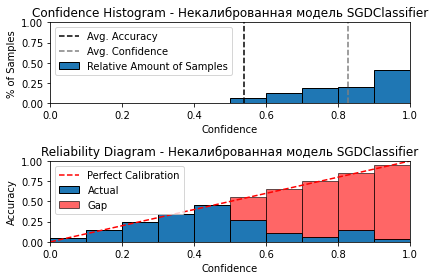

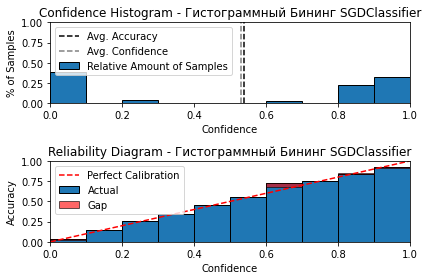

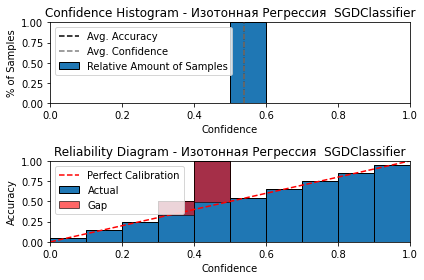

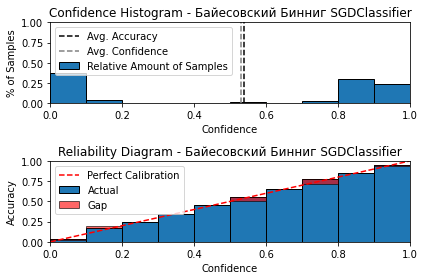

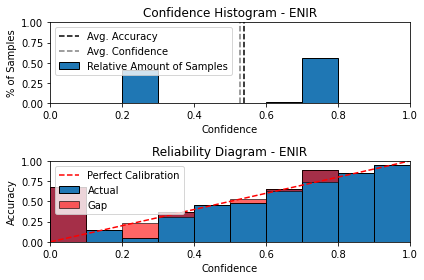

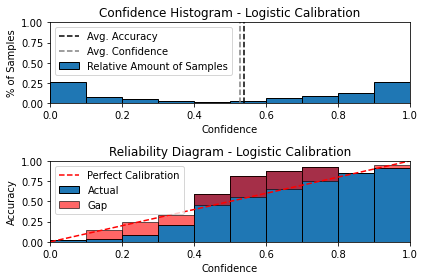

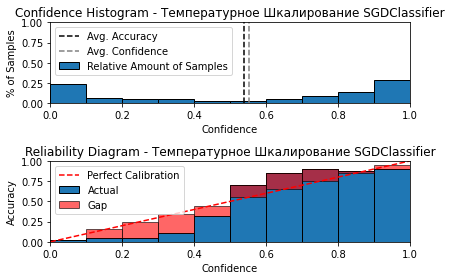

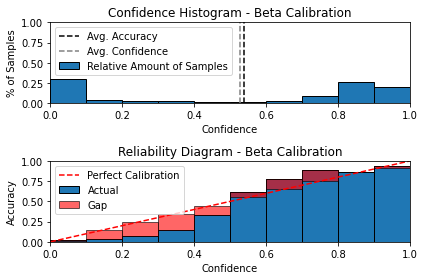

In [151]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

from netcal import global_accepts
from netcal.metrics import ACE, ECE, MCE
from netcal.presentation import ReliabilityDiagram


@global_accepts(list, str, int, (None, str), float, bool)
def single_example(models: list, datafile: str, bins: int, diagram: str = None,
                   validation_split: float = 0.7, save_models: bool = False) -> int:
    """
    Measure miscalibration of given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    diagram : str, optional, default: None
        Type of diagram wich should be plotted. This could be 'diagram', 'curve', 'inference' or None.
    validation_split : float
        Split ratio between build set and validation set.
    save_models : bool
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    # split data set into build set and validation set
    build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                        test_size=validation_split,
                                                                                        stratify=ground_truth,
                                                                                        random_state=None)

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    predictions = []
    all_ace = [ace.measure(validation_set_sm, validation_set_gt)]
    all_ece = [ece.measure(validation_set_sm, validation_set_gt)]
    all_mce = [mce.measure(validation_set_sm, validation_set_gt)]

    # ------------------------------------------

    # build and save models
    for model in models:
        name, instance = model
        print("Build %s model" % name)
        instance.fit(build_set_sm, build_set_gt)

        if save_models:
            instance.save_model("./models/%s.pkl" % name)

    # ------------------------------------------

    # perform predictions
    for model in models:
        _, instance = model
        prediction = instance.transform(validation_set_sm)
        predictions.append(prediction)

        all_ace.append(ace.measure(prediction, validation_set_gt))
        all_ece.append(ece.measure(prediction, validation_set_gt))
        all_mce.append(mce.measure(prediction, validation_set_gt))

    # ------------------------------------------

    # output formatted ECE
    names = [len(x[0]) for x in models]
    buffer = max(names)

    fill = (buffer - len("Default")) * " "
    print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_ace[0], all_ece[0], all_mce[0]))
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_ace[i], all_ece[i], all_mce[i]))

    # ------------------------------------------

    if diagram == 'diagram':

        diagram = ReliabilityDiagram(bins=bins, title_suffix="Некалиброванная модель SGDClassifier")
        diagram.plot(validation_set_sm, validation_set_gt, filename="test.png")
        for i, prediction in enumerate(predictions):
            diagram = ReliabilityDiagram(bins=bins, title_suffix=models[i][0])
            diagram.plot(prediction, validation_set_gt)

    elif diagram is None:
        pass
    else:
        print("Unknown diagram type \'%s\'" % diagram)
        return -1

    return 0


@global_accepts(list, str, int, bool)
def cross_validation_5_2(models: list, datafile: str, bins: int, save_models: bool = False) -> int:
    """
    5x2 cross validation on given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    save_models : bool, optional, default: False
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    if len(predictions.shape) == 2:
        n_classes = predictions.shape[1]
    else:
        n_classes = 2

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    all_accuracy = []

    all_ace = []
    all_ece = []
    all_mce = []

    for i in range(5):
        # split data set into build set and validation set
        build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                            test_size=0.5,
                                                                                            stratify=ground_truth)

        for _ in range(2):

            # 5x2 cross validation - flip build/val set after each iteration
            build_set_gt, validation_set_gt = validation_set_gt, build_set_gt
            build_set_sm, validation_set_sm = validation_set_sm, build_set_sm

            # lists for error metrics for current iteration (it)
            it_all_accuracy = []

            it_all_ace = []
            it_all_ece = []
            it_all_mce = []

            if n_classes > 2:
                labels = np.argmax(validation_set_sm, axis=1)
            else:
                labels = np.where(validation_set_sm > 0.5, np.ones_like(validation_set_gt),
                                  np.zeros_like(validation_set_gt))

            accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
            it_all_accuracy.append(accuracy)

            it_all_ace.append(ace.measure(validation_set_sm, validation_set_gt))
            it_all_ece.append(ece.measure(validation_set_sm, validation_set_gt))
            it_all_mce.append(mce.measure(validation_set_sm, validation_set_gt))

            # ------------------------------------------

            # build and save models
            for model in models:
                name, instance = model
                print("Build %s model" % name)

                instance.fit(build_set_sm, build_set_gt)
                if save_models:
                    instance.save_model("./models/%s_run_%d.pkl" % (name, i))

            # ------------------------------------------

            # perform predictions
            for model in models:
                _, instance = model
                prediction = instance.transform(validation_set_sm)

                if n_classes > 2:
                    labels = np.argmax(prediction, axis=1)
                else:
                    labels = np.where(prediction > 0.5, np.ones_like(validation_set_gt),
                                      np.zeros_like(validation_set_gt))

                accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
                it_all_accuracy.append(accuracy)

                it_all_ace.append(ace.measure(prediction, validation_set_gt))
                it_all_ece.append(ece.measure(prediction, validation_set_gt))
                it_all_mce.append(mce.measure(prediction, validation_set_gt))

            # append lists of current iterations
            all_accuracy.append(it_all_accuracy)
            all_ace.append(it_all_ace)
            all_ece.append(it_all_ece)
            all_mce.append(it_all_mce)

    # convert to NumPy arrays and reduce mean afterwards
    all_accuracy = np.array(all_accuracy)
    all_ace = np.array(all_ace)
    all_ece = np.array(all_ece)
    all_mce = np.array(all_mce)

    all_accuracy = np.mean(all_accuracy, axis=0)
    all_ace = np.mean(all_ace, axis=0)
    all_ece = np.mean(all_ece, axis=0)
    all_mce = np.mean(all_mce, axis=0)

    names = [len(x[0]) for x in models]
    buffer = max(names)

    # ---------------------------------------------------------
    # output formatted ECE
    fill = (buffer - len("Default")) * " "
    print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_accuracy[0],
                                                                       all_ace[0], all_ece[0], all_mce[0]))

    # ---------------------------------------------------------
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_accuracy[i],
                                                                           all_ace[i], all_ece[i], all_mce[i]))

    return 0

import netcal
from netcal.binning import HistogramBinning, IsotonicRegression, ENIR, BBQ
from netcal.scaling import LogisticCalibration, TemperatureScaling, BetaCalibration


from matplotlib import pyplot as plt


def example_calibration(datafile: str) -> int:
    """
    Example of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # diagram = None
    diagram = 'diagram'

    # define validation split for test data
    validation_split = 0.7

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Гистограммный Бининг SGDClassifier", histogram),
              ("Изотонная Регрессия  SGDClassifier", iso),
              ("Байесовский Бинниг SGDClassifier", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Температурное Шкалирование SGDClassifier", temperature),
              ("Beta Calibration", betacal)]

    # see ../utils.py for calibration and its measurement
    success = single_example(models=models, datafile=datafile, bins=bins,
                             diagram=diagram, validation_split=validation_split,
                             save_models=save_models)

    return success


def cross_validation(datafile: str) -> int:
    """
    5x2 cross validation of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Histogram Binning", histogram),
              ("Isotonic Regression", iso),
              ("BBQ", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Temperature Scaling", temperature),
              ("Beta Calibration", betacal)]

    # invoke cross validation function from ../utils.py
    # see ../utils.py for calibration and its measurement
    success = cross_validation_5_2(models=models, datafile=datafile, bins=bins, save_models=save_models)

    return success


if __name__ == '__main__':

    # example on CIFAR-10 with LeNet-5 and WideResnet-16-4
   # lenet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/lenet-5-cifar-10.npz"
    #wideresnet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/wideresnet-16-4-cifar-10.npz"

    file_str = '/Users/julia/Desktop/ML/data_sgd.npz'
    cifar10 = [file_str]

    # for each model, perform a single example and a 5x2 cross validation
    for model in cifar10:
        example_calibration(model)
        cross_validation(model)


    plt.show()
   

In [152]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

from netcal import global_accepts
from netcal.metrics import ACE, ECE, MCE
from netcal.presentation import ReliabilityDiagram


@global_accepts(list, str, int, (None, str), float, bool)
def single_example(models: list, datafile: str, bins: int, diagram: str = None,
                   validation_split: float = 0.7, save_models: bool = False) -> int:
    """
    Measure miscalibration of given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    diagram : str, optional, default: None
        Type of diagram wich should be plotted. This could be 'diagram', 'curve', 'inference' or None.
    validation_split : float
        Split ratio between build set and validation set.
    save_models : bool
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    # split data set into build set and validation set
    build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                        test_size=validation_split,
                                                                                        stratify=ground_truth,
                                                                                        random_state=None)

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    predictions = []
    all_ace = [ace.measure(validation_set_sm, validation_set_gt)]
    all_ece = [ece.measure(validation_set_sm, validation_set_gt)]
    all_mce = [mce.measure(validation_set_sm, validation_set_gt)]

    # ------------------------------------------

    # build and save models
    for model in models:
        name, instance = model
        print("Build %s model" % name)
        instance.fit(build_set_sm, build_set_gt)

        if save_models:
            instance.save_model("./models/%s.pkl" % name)

    # ------------------------------------------

    # perform predictions
    for model in models:
        _, instance = model
        prediction = instance.transform(validation_set_sm)
        predictions.append(prediction)

        all_ace.append(ace.measure(prediction, validation_set_gt))
        all_ece.append(ece.measure(prediction, validation_set_gt))
        all_mce.append(mce.measure(prediction, validation_set_gt))

    # ------------------------------------------

    # output formatted ECE
    names = [len(x[0]) for x in models]
    buffer = max(names)

    fill = (buffer - len("Default")) * " "
    print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_ace[0], all_ece[0], all_mce[0]))
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_ace[i], all_ece[i], all_mce[i]))

    # ------------------------------------------

    if diagram == 'diagram':

        diagram = ReliabilityDiagram(bins=bins, title_suffix="Некалиброванная модель RandomForestClassifier")
        diagram.plot(validation_set_sm, validation_set_gt, filename="test.png")
        for i, prediction in enumerate(predictions):
            diagram = ReliabilityDiagram(bins=bins, title_suffix=models[i][0])
            diagram.plot(prediction, validation_set_gt)

    elif diagram is None:
        pass
    else:
        print("Unknown diagram type \'%s\'" % diagram)
        return -1

    return 0


@global_accepts(list, str, int, bool)
def cross_validation_5_2(models: list, datafile: str, bins: int, save_models: bool = False) -> int:
    """
    5x2 cross validation on given methods on specified dataset.
    Parameters
    ----------
    models : list
        List of tuples with [('<name>', <instance of CalibrationMethod>), ...].
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    bins : int
        Number of bins used by ECE, MCE and ReliabilityDiagram.
    save_models : bool, optional, default: False
        True if instances of calibration methods should be stored.
    Returns
    -------
    int
        0 on success, -1 otherwise
    """

    if not os.path.exists(datafile):
        print("Dataset \'%s\' does not exist" % datafile)
        return -1

    # read NumPy input files
    try:
        with open(datafile, "rb") as open_file:
            npzfile = np.load(open_file)
            ground_truth = npzfile['ground_truth'].squeeze()
            predictions = npzfile['predictions'].squeeze()
    except KeyError:
        print("Key \'ground_truth\' or \'predictions\' not found in file \'%s\'" % datafile)
        return -1

    if len(predictions.shape) == 2:
        n_classes = predictions.shape[1]
    else:
        n_classes = 2

    # initialize error metrics
    ace = ACE(bins)
    ece = ECE(bins)
    mce = MCE(bins)

    all_accuracy = []

    all_ace = []
    all_ece = []
    all_mce = []

    for i in range(5):
        # split data set into build set and validation set
        build_set_gt, validation_set_gt, build_set_sm, validation_set_sm = train_test_split(ground_truth, predictions,
                                                                                            test_size=0.5,
                                                                                            stratify=ground_truth)

        for _ in range(2):

            # 5x2 cross validation - flip build/val set after each iteration
            build_set_gt, validation_set_gt = validation_set_gt, build_set_gt
            build_set_sm, validation_set_sm = validation_set_sm, build_set_sm

            # lists for error metrics for current iteration (it)
            it_all_accuracy = []

            it_all_ace = []
            it_all_ece = []
            it_all_mce = []

            if n_classes > 2:
                labels = np.argmax(validation_set_sm, axis=1)
            else:
                labels = np.where(validation_set_sm > 0.5, np.ones_like(validation_set_gt),
                                  np.zeros_like(validation_set_gt))

            accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
            it_all_accuracy.append(accuracy)

            it_all_ace.append(ace.measure(validation_set_sm, validation_set_gt))
            it_all_ece.append(ece.measure(validation_set_sm, validation_set_gt))
            it_all_mce.append(mce.measure(validation_set_sm, validation_set_gt))

            # ------------------------------------------

            # build and save models
            for model in models:
                name, instance = model
                print("Build %s model" % name)

                instance.fit(build_set_sm, build_set_gt)
                if save_models:
                    instance.save_model("./models/%s_run_%d.pkl" % (name, i))

            # ------------------------------------------

            # perform predictions
            for model in models:
                _, instance = model
                prediction = instance.transform(validation_set_sm)

                if n_classes > 2:
                    labels = np.argmax(prediction, axis=1)
                else:
                    labels = np.where(prediction > 0.5, np.ones_like(validation_set_gt),
                                      np.zeros_like(validation_set_gt))

                accuracy = np.mean(np.where(labels == validation_set_gt, np.ones_like(labels), np.zeros_like(labels)))
                it_all_accuracy.append(accuracy)

                it_all_ace.append(ace.measure(prediction, validation_set_gt))
                it_all_ece.append(ece.measure(prediction, validation_set_gt))
                it_all_mce.append(mce.measure(prediction, validation_set_gt))

            # append lists of current iterations
            all_accuracy.append(it_all_accuracy)
            all_ace.append(it_all_ace)
            all_ece.append(it_all_ece)
            all_mce.append(it_all_mce)

    # convert to NumPy arrays and reduce mean afterwards
    all_accuracy = np.array(all_accuracy)
    all_ace = np.array(all_ace)
    all_ece = np.array(all_ece)
    all_mce = np.array(all_mce)

    all_accuracy = np.mean(all_accuracy, axis=0)
    all_ace = np.mean(all_ace, axis=0)
    all_ece = np.mean(all_ece, axis=0)
    all_mce = np.mean(all_mce, axis=0)

    names = [len(x[0]) for x in models]
    buffer = max(names)

    # ---------------------------------------------------------
    # output formatted ECE
    fill = (buffer - len("Default")) * " "
    print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % ("Default", fill, all_accuracy[0],
                                                                       all_ace[0], all_ece[0], all_mce[0]))

    # ---------------------------------------------------------
    for i, model in enumerate(models, start=1):
        name, instance = model
        fill = (buffer - len(name)) * " "
        print("%s%s Accuracy: %.5f - ACE: %.5f - ECE: %.5f - MCE: %.5f" % (name, fill, all_accuracy[i],
                                                                           all_ace[i], all_ece[i], all_mce[i]))

    return 0

import netcal
from netcal.binning import HistogramBinning, IsotonicRegression, ENIR, BBQ
from netcal.scaling import LogisticCalibration, TemperatureScaling, BetaCalibration


from matplotlib import pyplot as plt


def example_calibration(datafile: str) -> int:
    """
    Example of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # diagram = None
    diagram = 'diagram'

    # define validation split for test data
    validation_split = 0.7

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Гистограммный Бининг RandomForestClassifier", histogram),
              ("Изотонная Регрессия  RandomForestClassifier", iso),
              ("Байесовский Бинниг RandomForestClassifier", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Температурное Шкалирование RandomForestClassifier", temperature),
              ("Beta Calibration", betacal)]

    # see ../utils.py for calibration and its measurement
    success = single_example(models=models, datafile=datafile, bins=bins,
                             diagram=diagram, validation_split=validation_split,
                             save_models=save_models)

    return success


def cross_validation(datafile: str) -> int:
    """
    5x2 cross validation of several calibration methods.
    Parameters
    ----------
    datafile : str
        Path to datafile which contains two NumPy arrays with keys 'ground_truth' and 'predictions'.
    Returns
    -------
    int
        0 at success, -1 otherwise.
    """

    bins = 10

    # if True, a Pickle-Object will be written out for each calibration model built
    save_models = False

    histogram = HistogramBinning(bins)
    iso = IsotonicRegression()
    bbq = BBQ()
    enir = ENIR()
    lr_calibration = LogisticCalibration()
    temperature = TemperatureScaling()
    betacal = BetaCalibration()

    models = [("Histogram Binning", histogram),
              ("Isotonic Regression", iso),
              ("BBQ", bbq),
              ("ENIR", enir),
              ("Logistic Calibration", lr_calibration),
              ("Temperature Scaling", temperature),
              ("Beta Calibration", betacal)]

    # invoke cross validation function from ../utils.py
    # see ../utils.py for calibration and its measurement
    success = cross_validation_5_2(models=models, datafile=datafile, bins=bins, save_models=save_models)

    return success


if __name__ == '__main__':

    # example on CIFAR-10 with LeNet-5 and WideResnet-16-4
   # lenet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/lenet-5-cifar-10.npz"
    #wideresnet = "/Users/julia/Desktop/calibration-framework-r1.1.3/examples/classification/records/cifar10/wideresnet-16-4-cifar-10.npz"

    file_str = '/Users/julia/Desktop/ML/data_forest.npz'
    cifar10 = [file_str]

    # for each model, perform a single example and a 5x2 cross validation
    for model in cifar10:
        example_calibration(model)
        cross_validation(model)


    plt.show()
   

Build Гистограммный Бининг RandomForestClassifier model
Build Изотонная Регрессия  RandomForestClassifier model
Build Байесовский Бинниг RandomForestClassifier model
Build ENIR model


ValueError: zero-size array to reduction operation minimum which has no identity

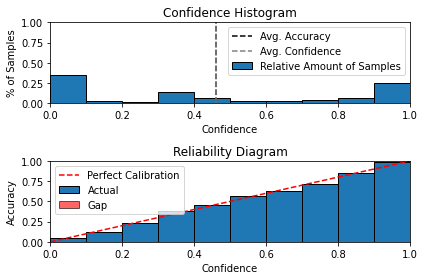

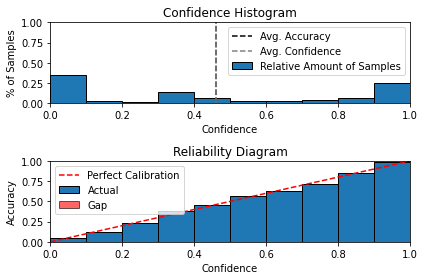

In [160]:
diagram.plot(calibrated_isotonic_rfc, y_test[:,0]) 

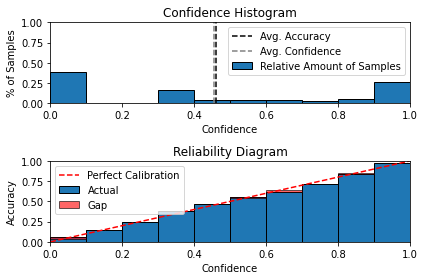

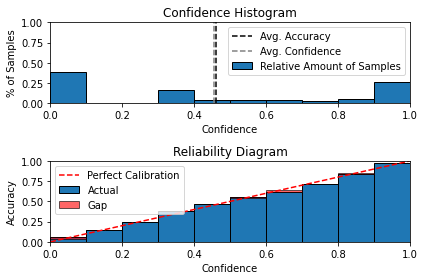

In [162]:
diagram.plot(calibrated_bbq_rfc, y_test[:,0]) 

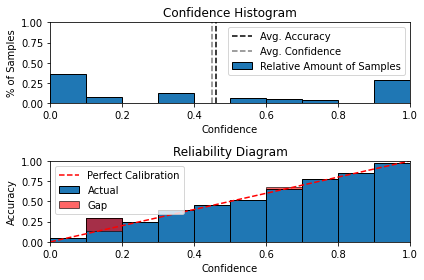

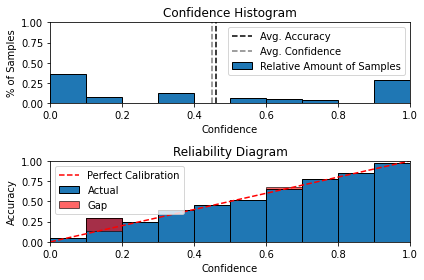

In [163]:
diagram.plot(calibrated_histogram_rfc, y_test[:,0]) 

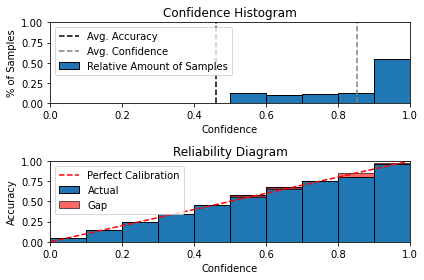

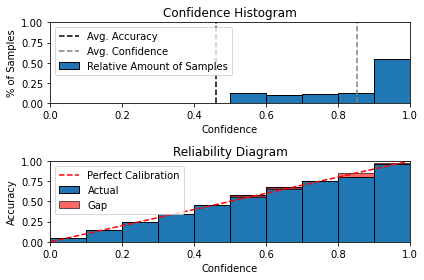

In [166]:
diagram.plot(predict_prob_rfc, y_test[:,0]) 